<h1>Data Cleaning and Preprocessing
</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')

In [3]:
df = df.drop(columns=['patientid'])


In [4]:
print(df.head())

   age  gender  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0   53       1          2        171                0                  0   
1   40       1          0         94              229                  0   
2   49       1          2        133              142                  0   
3   43       1          0        138              295                  1   
4   31       1          1        199                0                  0   

   restingrelectro  maxheartrate  exerciseangia  oldpeak  slope  \
0                1           147              0      5.3      3   
1                1           115              0      3.7      1   
2                0           202              1      5.0      1   
3                1           153              0      3.2      2   
4                2           136              0      5.3      3   

   noofmajorvessels  target  
0                 3       1  
1                 1       0  
2                 0       0  
3                 2 

In [5]:
# Data Cleaning: Handling missing values (if any)
df = df.dropna()  # Drop rows with missing values

In [6]:
# Data Preprocessing: Convert categorical variables to numeric
df['gender'] = df['gender'].astype(int)
df['chestpain'] = df['chestpain'].astype(int)
df['fastingbloodsugar'] = df['fastingbloodsugar'].astype(int)
df['restingrelectro'] = df['restingrelectro'].astype(int)
df['exerciseangia'] = df['exerciseangia'].astype(int)
df['slope'] = df['slope'].astype(int)
df['noofmajorvessels'] = df['noofmajorvessels'].astype(int)
df['target'] = df['target'].astype(int)

<h1>Exploratory Data Analysis (EDA)</h1>

In [7]:
# Summary statistics
print(df.describe())

              age       gender    chestpain    restingBP  serumcholestrol  \
count  1000.00000  1000.000000  1000.000000  1000.000000      1000.000000   
mean     49.24200     0.765000     0.980000   151.747000       311.447000   
std      17.86473     0.424211     0.953157    29.965228       132.443801   
min      20.00000     0.000000     0.000000    94.000000         0.000000   
25%      34.00000     1.000000     0.000000   129.000000       235.750000   
50%      49.00000     1.000000     1.000000   147.000000       318.000000   
75%      64.25000     1.000000     2.000000   181.000000       404.250000   
max      80.00000     1.000000     3.000000   200.000000       602.000000   

       fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  \
count        1000.000000      1000.000000   1000.000000    1000.000000   
mean            0.296000         0.748000    145.477000       0.498000   
std             0.456719         0.770123     34.190268       0.500246   
min       

In [8]:
# Distribution of target variable
print(df['target'].value_counts())

target
1    580
0    420
Name: count, dtype: int64


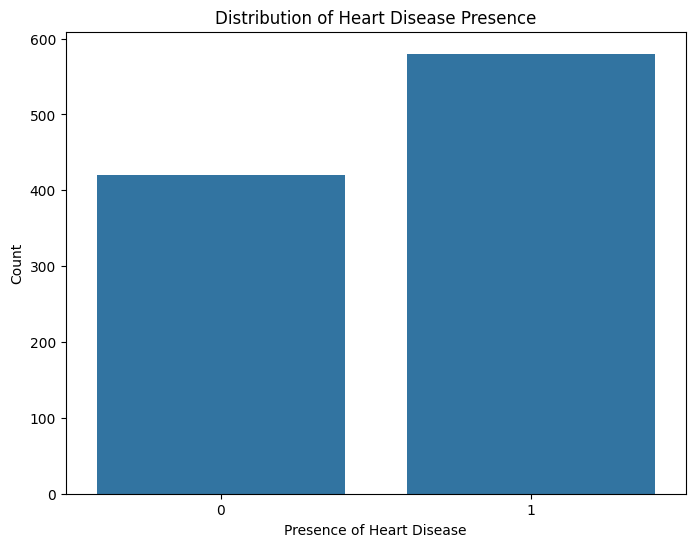

In [9]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease Presence')
plt.xlabel('Presence of Heart Disease')
plt.ylabel('Count')
# plt.xticks([0, 1], ['No Disease', 'Heart Disease'])
plt.show()


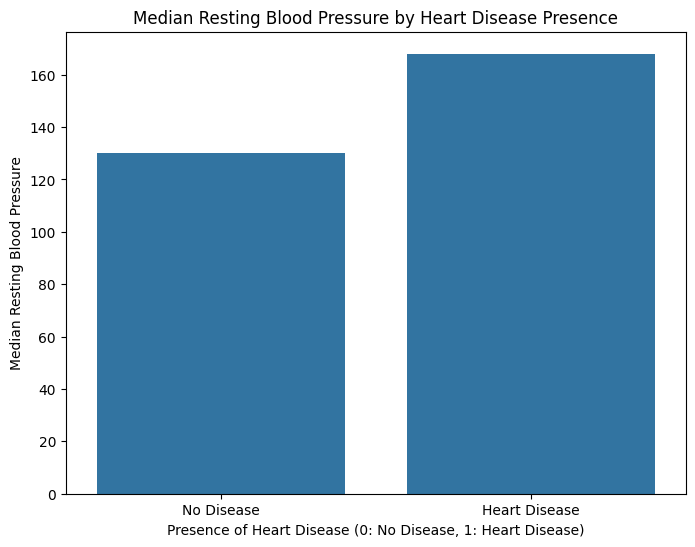

In [10]:
# Data Aggregation: Median resting blood pressure by target
median_bp_by_target = df.groupby('target')['restingBP'].median()

# Visualization: Bar plot for median resting blood pressure by target
plt.figure(figsize=(8, 6))
sns.barplot(x=median_bp_by_target.index, y=median_bp_by_target.values)
plt.title('Median Resting Blood Pressure by Heart Disease Presence')
plt.xlabel('Presence of Heart Disease (0: No Disease, 1: Heart Disease)')
plt.ylabel('Median Resting Blood Pressure')
plt.xticks([0, 1], ['No Disease', 'Heart Disease'])
plt.show()

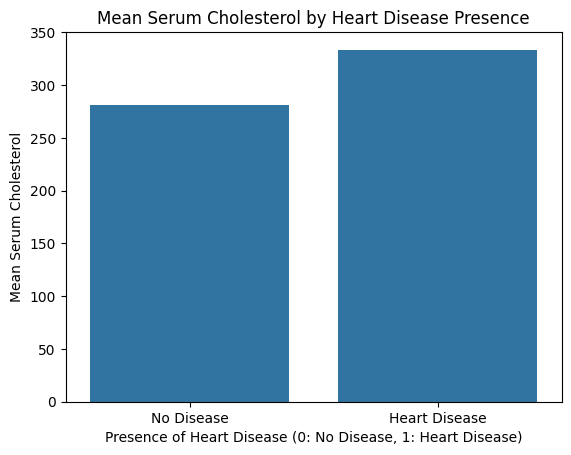

In [11]:
mean_chol_by_target = df.groupby('target')['serumcholestrol'].mean()


sns.barplot(x=mean_chol_by_target.index, y=mean_chol_by_target.values)
plt.title('Mean Serum Cholesterol by Heart Disease Presence')
plt.xlabel('Presence of Heart Disease (0: No Disease, 1: Heart Disease)')
plt.ylabel('Mean Serum Cholesterol')
plt.xticks([0, 1], ['No Disease', 'Heart Disease'])
plt.show()

In [12]:
# Pairplot for visualizing relationships
import seaborn as sns
import matplotlib.pyplot as plt

<h1>Descriptive Statistics & Data Aggregation</h1>

In [13]:
# Aggregation example: mean age by target
mean_age_by_target = df.groupby('target')['age'].mean()
print(mean_age_by_target)

target
0    49.066667
1    49.368966
Name: age, dtype: float64


In [14]:
mean_bp_by_gender = df.groupby('gender')['restingBP'].mean()
print("Mean Resting Blood Pressure by Gender (0: Female, 1: Male):\n", mean_bp_by_gender)

Mean Resting Blood Pressure by Gender (0: Female, 1: Male):
 gender
0    155.514894
1    150.589542
Name: restingBP, dtype: float64


In [15]:
median_chol_by_slope = df.groupby('slope')['serumcholestrol'].median()
print(median_chol_by_slope)

slope
0    268.5
1    284.0
2    358.5
3    338.0
Name: serumcholestrol, dtype: float64


In [16]:
disease_percentage_by_gender = df.groupby('gender')['target'].mean() * 100
print("Percentage of Presence of Heart Disease by Gender (0: Female, 1: Male):\n", disease_percentage_by_gender)

Percentage of Presence of Heart Disease by Gender (0: Female, 1: Male):
 gender
0    56.595745
1    58.431373
Name: target, dtype: float64


In [17]:
age_bins = [20, 40, 60, 80, np.inf]
age_labels = ['20-39', '40-59', '60-79', '80+']
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Calculate mean serum cholesterol for each gender and age category
mean_chol_by_gender_age = df.groupby(['gender', 'age_category'])['maxheartrate'].mean()
print("Mean Serum Cholesterol by Gender and Age Category:\n", mean_chol_by_gender_age)

Mean Serum Cholesterol by Gender and Age Category:
 gender  age_category
0       20-39           149.625000
        40-59           137.025641
        60-79           137.558442
        80+                    NaN
1       20-39           146.200000
        40-59           151.577869
        60-79           143.614108
        80+                    NaN
Name: maxheartrate, dtype: float64


C:\Users\sange\AppData\Local\Temp\ipykernel_10276\52409931.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_chol_by_gender_age = df.groupby(['gender', 'age_category'])['maxheartrate'].mean()


C:\Users\sange\AppData\Local\Temp\ipykernel_10276\3199930878.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_max_hr_by_gender_age = df.groupby(['gender', 'age_category'])['maxheartrate'].mean()


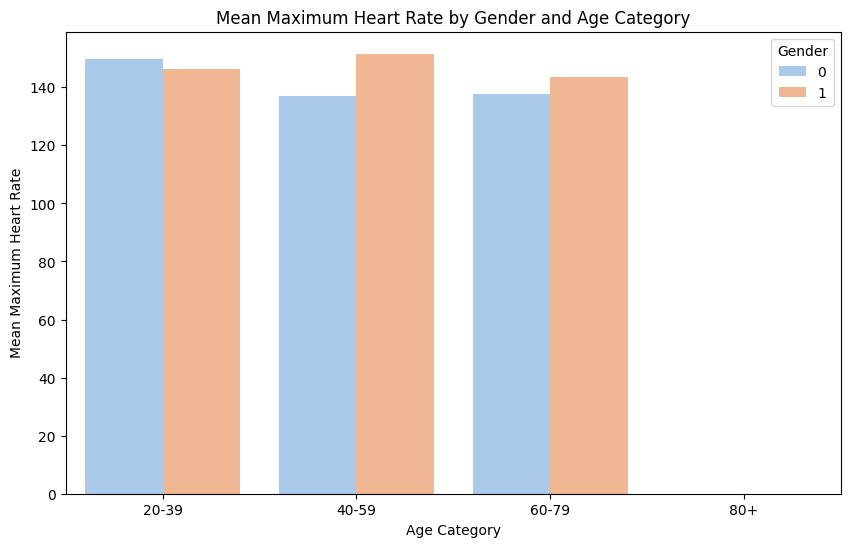

In [18]:
# Calculate mean maxheartrate for each gender and age category
mean_max_hr_by_gender_age = df.groupby(['gender', 'age_category'])['maxheartrate'].mean()
mean_max_hr_by_gender_age = mean_max_hr_by_gender_age.reset_index()

# Set figure size
plt.figure(figsize=(10, 6))

# Create a grouped bar plot
sns.barplot(x='age_category', y='maxheartrate', hue='gender', data=mean_max_hr_by_gender_age, palette='pastel')

# Add title and labels
plt.title('Mean Maximum Heart Rate by Gender and Age Category')
plt.xlabel('Age Category')
plt.ylabel('Mean Maximum Heart Rate')

# Add legend
plt.legend(title='Gender', loc='upper right')

# Show plot
plt.show()


In [19]:
# Calculate percentage of presence of heart disease for each gender and fasting blood sugar level
disease_percentage_by_gender_fbs = df.groupby(['gender', 'fastingbloodsugar'])['target'].mean() * 100
disease_percentage_by_gender_fbs = disease_percentage_by_gender_fbs.reset_index()

# Set descriptive labels for gender and fasting blood sugar level
disease_percentage_by_gender_fbs['gender'] = disease_percentage_by_gender_fbs['gender'].map({0: 'Female', 1: 'Male'})
disease_percentage_by_gender_fbs['fastingbloodsugar'] = disease_percentage_by_gender_fbs['fastingbloodsugar'].map({0: '<120 mg/dl', 1: '>=120 mg/dl'})

print("Percentage of Presence of Heart Disease by Gender and Fasting Blood Sugar Level:\n", disease_percentage_by_gender_fbs)


Percentage of Presence of Heart Disease by Gender and Fasting Blood Sugar Level:
    gender fastingbloodsugar     target
0  Female        <120 mg/dl  48.235294
1  Female       >=120 mg/dl  78.461538
2    Male        <120 mg/dl  48.314607
3    Male       >=120 mg/dl  81.818182


In [20]:
# Exclude categorical columns from aggregation
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
result = df.groupby('target')[numeric_columns].mean()
print(result)


              age    gender  chestpain   restingBP  serumcholestrol  \
target                                                                
0       49.066667  0.757143   0.359524  134.769048       281.059524   
1       49.368966  0.770690   1.429310  164.041379       333.451724   

        fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  \
target                                                                    
0                0.133333         0.361905    136.307143       0.521429   
1                0.413793         1.027586    152.117241       0.481034   

         oldpeak    slope  noofmajorvessels  target  
target                                               
0       2.509524  0.60000          0.659524     0.0  
1       2.851207  2.22069          1.629310     1.0  


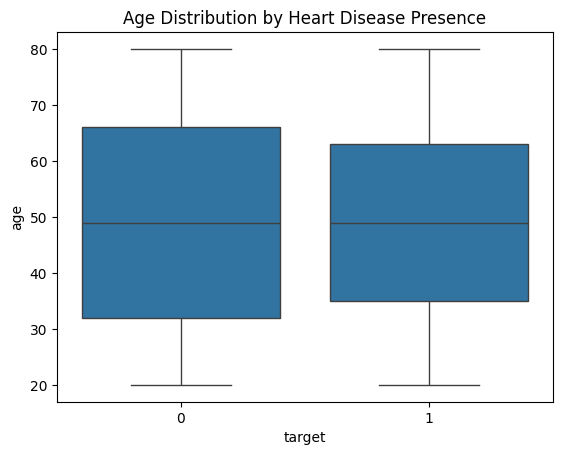

In [21]:
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution by Heart Disease Presence')
plt.show()

<h1>Data Visualization</h1>

In [22]:
target_counts = df['target'].value_counts()

# Print the counts
print("Count of target 0 (No Disease):", target_counts[0])
print("Count of target 1 (Disease):", target_counts[1])

Count of target 0 (No Disease): 420
Count of target 1 (Disease): 580


Count of target 0 (No Disease): 420
Count of target 1 (Disease): 580


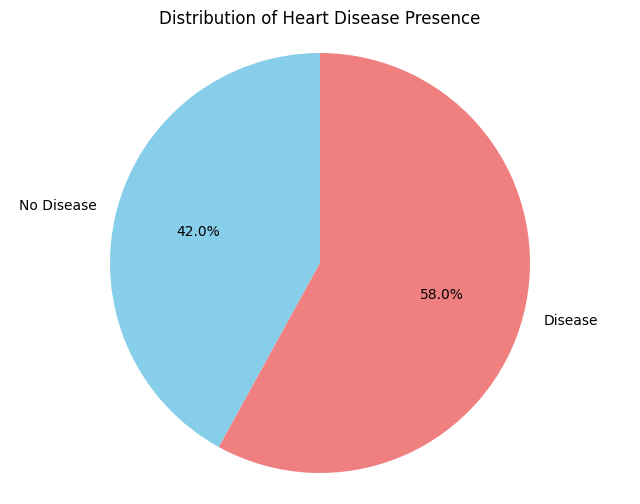

In [23]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
# Count the number of occurrences of each target value (0 and 1)
target_counts = df['target'].value_counts().reindex([0, 1], fill_value=0)

# Print the counts
print("Count of target 0 (No Disease):", target_counts[0])
print("Count of target 1 (Disease):", target_counts[1])

# Create labels for the pie chart
labels = ['No Disease', 'Disease']

# Creating a pie chart
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Distribution of Heart Disease Presence')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

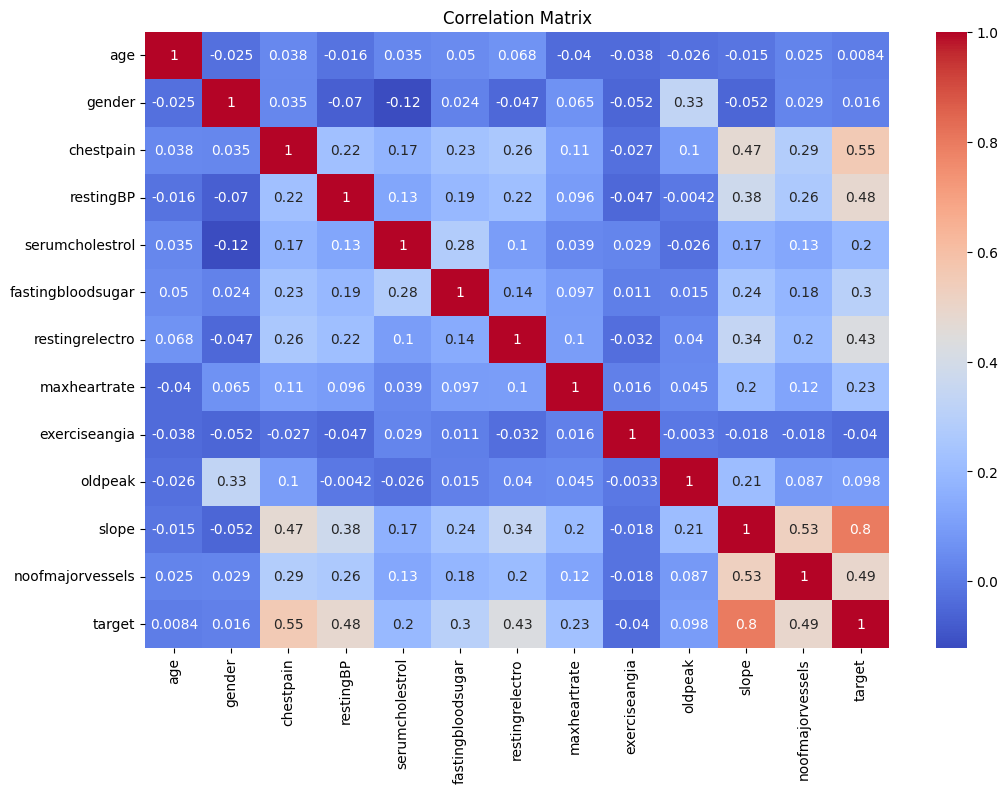

In [24]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


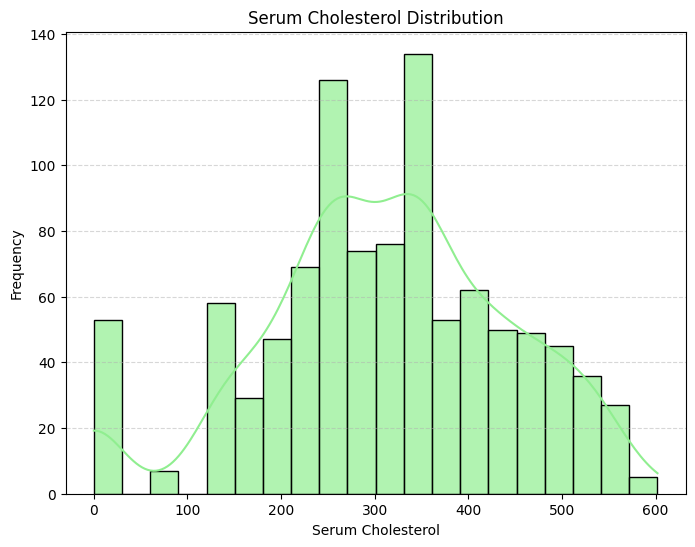

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df['serumcholestrol'], bins=20, kde=True, color='lightgreen', alpha=0.7)  # Histogram for 'serumcholestrol' feature
plt.title('Serum Cholesterol Distribution')
plt.xlabel('Serum Cholesterol')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Adding horizontal grid lines
plt.show()


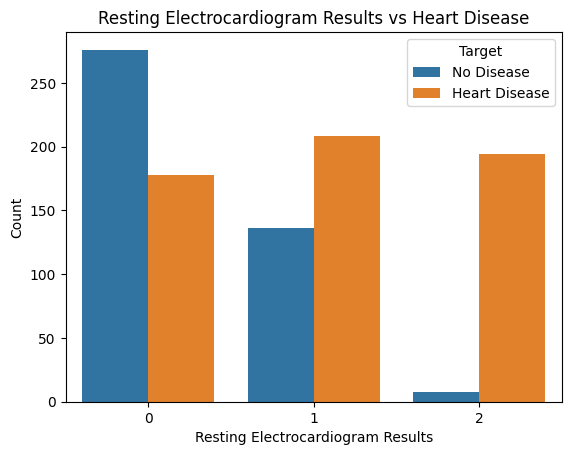

In [26]:
sns.countplot(x='restingrelectro', hue='target', data=df)

# Adding labels and title
plt.title('Resting Electrocardiogram Results vs Heart Disease')
plt.xlabel('Resting Electrocardiogram Results')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Disease', 'Heart Disease'])
plt.show()

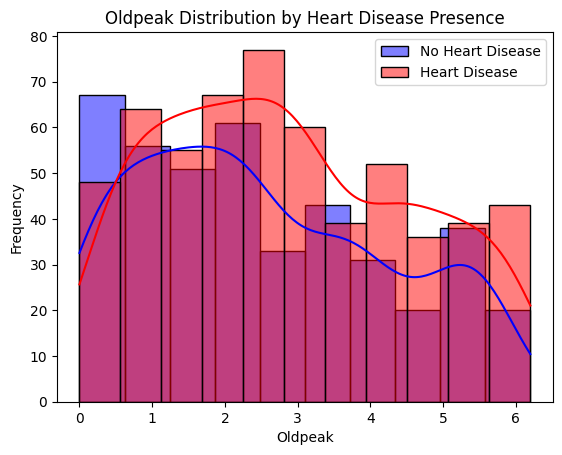

In [27]:
target_0 = df[df['target'] == 0]
target_1 = df[df['target'] == 1]

# Plot histograms with density plots
sns.histplot(target_0['oldpeak'], color='blue', kde=True, label='No Heart Disease')
sns.histplot(target_1['oldpeak'], color='red', kde=True, label='Heart Disease')

# Set plot title and labels
plt.title('Oldpeak Distribution by Heart Disease Presence')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')

# Show legend
plt.legend()


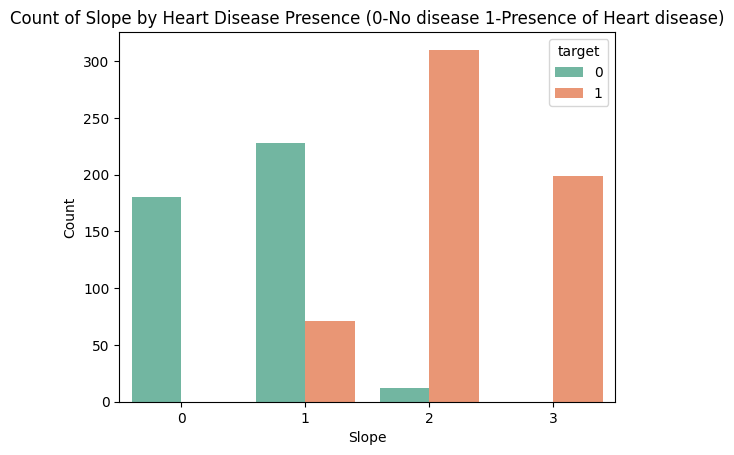

In [28]:
sns.countplot(data=df, x='slope', hue='target', palette='Set2')

# Set plot title and labels
plt.title('Count of Slope by Heart Disease Presence (0-No disease 1-Presence of Heart disease)')
plt.xlabel('Slope')
plt.ylabel('Count')

# Show plot
plt.show()

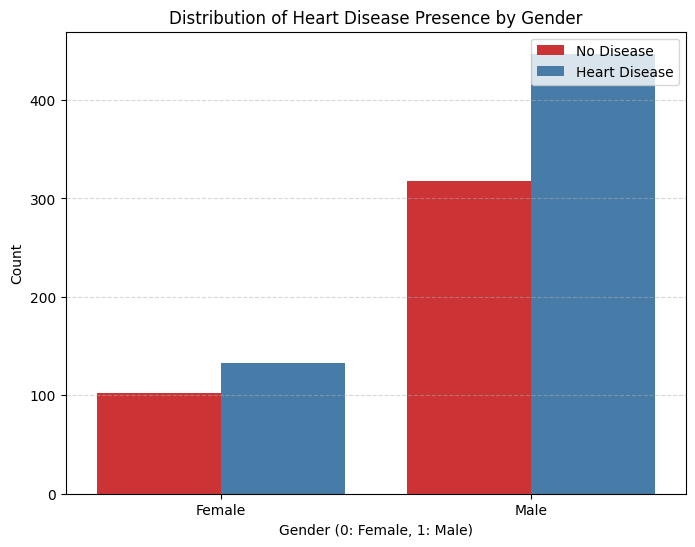

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='target', data=df, palette='Set1')  # Count plot for 'gender' with hue as 'target'
plt.title('Distribution of Heart Disease Presence by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(['No Disease', 'Heart Disease'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Adding horizontal grid lines
plt.show()


<h1>Model Prediction</h1>

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
print(df.dtypes)

age                     int64
gender                  int32
chestpain               int32
restingBP               int64
serumcholestrol         int64
fastingbloodsugar       int32
restingrelectro         int32
maxheartrate            int64
exerciseangia           int32
oldpeak               float64
slope                   int32
noofmajorvessels        int32
target                  int32
age_category         category
dtype: object


In [32]:
# Check if the 'age_category' column exists in the DataFrame and drop it if it does
if 'age_category' in df.columns:
    df.drop('age_category', axis=1, inplace=True)

# Display the remaining columns to confirm
print(df.columns)


Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels', 'target'],
      dtype='object')


In [33]:
# Assuming df is your DataFrame containing the dataset
# Separate features and target variable
X = df.drop('target', axis=1)
y = df['target']

In [34]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [35]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [36]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_normalized, y_train)


RandomForestClassifier(random_state=42)

In [37]:

# Predictions
y_pred = model.predict(X_test_normalized)



In [38]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.9866666666666667
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       138
           1       0.99      0.99      0.99       162

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



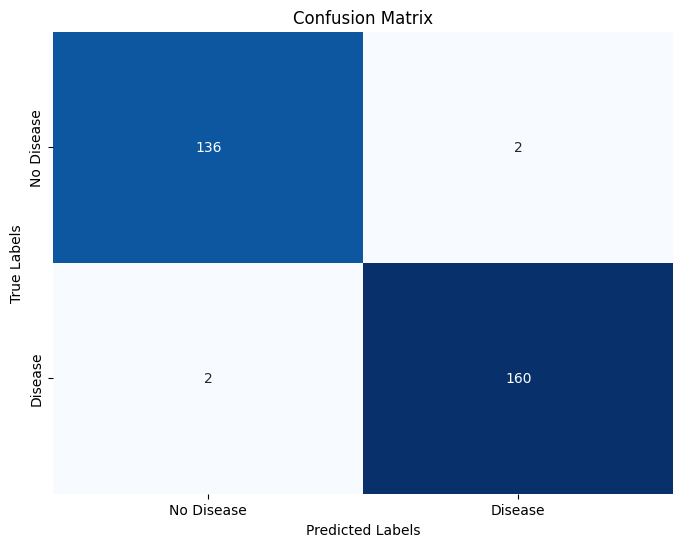

In [39]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


<h1>Testing with new data</h1>

In [40]:
def predict_heart_disease(age, gender, chestpain, restingBP, serumcholestrol,
                          fastingbloodsugar, restingrelectro, maxheartrate, exerciseangia,
                          oldpeak, slope, noofmajorvessels):
    # Create a dataframe from the input data
    input_data = pd.DataFrame({
        'age': [age],
        'gender': [gender],
        'chestpain': [chestpain],
        'restingBP': [restingBP],
        'serumcholestrol': [serumcholestrol],
        'fastingbloodsugar': [fastingbloodsugar],
        'restingrelectro': [restingrelectro],
        'maxheartrate': [maxheartrate],
        'exerciseangia': [exerciseangia],
        'oldpeak': [oldpeak],
        'slope': [slope],
        'noofmajorvessels': [noofmajorvessels]
    })
    
    # Normalize the input data
    input_data_normalized = scaler.transform(input_data)
    
    # Predict using the trained model
    prediction = model.predict(input_data_normalized)
    
    # Return the prediction
    if prediction[0] == 1:
        return "The patient is most likely to have heart disease."
    else:
        return "The patient is not likely to have heart disease."



In [41]:
patient_id = "34521"
age = 55
gender = 1  # 1 for male, 0 for female
chestpain = 3  # Typical angina
restingBP = 160  # High blood pressure
serumcholestrol = 260  # High cholesterol
fastingbloodsugar = 1  # Fasting blood sugar > 120 mg/dl
restingrelectro = 2  # Showing abnormal results
maxheartrate = 120  # Lower than normal maximum heart rate
exerciseangia = 1  # Exercise induced angina present
oldpeak = 3.5  # Significant ST depression
slope = 2  # Downsloping
noofmajorvessels = 2  # Two major vessels

# Predict heart disease
result = predict_heart_disease(age, gender, chestpain, restingBP, serumcholestrol,
                               fastingbloodsugar, restingrelectro, maxheartrate, exerciseangia,
                               oldpeak, slope, noofmajorvessels)
print(f"Result for patient ID {patient_id}: {result}")

Result for patient ID 34521: The patient is most likely to have heart disease.


In [42]:
patient_id = "67890"
age = 30
gender = 0  # 1 for male, 0 for female
chestpain = 0  # No chest pain
restingBP = 110  # Normal blood pressure
serumcholestrol = 180  # Normal cholesterol
fastingbloodsugar = 0  # Fasting blood sugar <= 120 mg/dl
restingrelectro = 0  # Normal resting electrocardiogram
maxheartrate = 170  # Normal maximum heart rate
exerciseangia = 0  # No exercise-induced angina
oldpeak = 0.0  # No ST depression
slope = 1  # Flat
noofmajorvessels = 0  # No major vessels

# Predict heart disease
result = predict_heart_disease(age, gender, chestpain, restingBP, serumcholestrol,
                               fastingbloodsugar, restingrelectro, maxheartrate, exerciseangia,
                               oldpeak, slope, noofmajorvessels)
print(f"Result for patient ID {patient_id}: {result}")

Result for patient ID 67890: The patient is not likely to have heart disease.
